In [1]:
from dotenv import load_dotenv
load_dotenv()

True

# 方法一：使用init_chat_model初始化大模型

In [2]:
import os
from langchain.chat_models import init_chat_model

# os.environ["OPENAI_API_KEY"] = "sk-..."

model = init_chat_model(
    "gpt-4.1",
    # Kwargs passed to the model:
    temperature=0.7,
    timeout=30,
    max_tokens=1000,
)

# 方法二：使用大模型类初始化，比如OpenAI 使用from langchain_openai import ChatOpenAI

In [8]:
# import os
# from langchain_openai import ChatOpenAI

# # os.environ["OPENAI_API_KEY"] = "sk-..."

# model = ChatOpenAI(model="")

调用大模型的时候，还可以指定参数配置：
- model：大模型
- api_key：需要申请大模型提供商的API Key
- temperature：表示大模型生成答案的随机性，值越高，表示答案越随机
- timeout：大模型响应时间限制
- max_tokens：大模型生成的最大token数
- max_retries：大模型最大的尝试次数，比如因为网络延时或者rate限制等因素

In [3]:
response = model.invoke("Why do parrots talk?")

大模型调用通常有三种方式：
1、invoke：返回完整答案；
2、stream：流式输出；
3、batch：多个请求并行处理；

In [5]:
response

AIMessage(content='Parrots "talk" because they are excellent mimics and have evolved both the physical ability and social reasons to imitate sounds—including human speech.\n\nHere\'s why parrots talk:\n\n### 1. **Social Communication**\n- **Highly Social Creatures:** In the wild, parrots live in groups (flocks). Communication is vital for flock coordination, bonding, and survival.\n- **Adaptability:** When kept as pets, parrots treat humans as their "flock members" and use sound imitation (including speech) to bond and interact.\n\n### 2. **Vocal Learning Ability**\n- **Physical Adaptation:** Parrots have a specialized voice box called the **syrinx** that allows them to produce a wide range of sounds.\n- **Brain Structure:** They have well-developed brain regions for mimicking and learning new sounds (the "song system" similar to that of songbirds).\n\n### 3. **Sound Imitation**\n- **Part of Natural Behavior:** In the wild, parrots mimic the calls of their flock to fit in and communica

# 一、Invocation
## 1.1 Invoke

In [ ]:
# Dictionary format
from langchain.messages import HumanMessage, AIMessage, SystemMessage

conversation = [
    {"role": "system", "content": "You are a helpful assistant that translates English to French."},
    {"role": "user", "content": "Translate: I love programming."},
    {"role": "assistant", "content": "J'adore la programmation."},
    {"role": "user", "content": "Translate: I love building applications."}
]

response = model.invoke(conversation)
print(response)  # AIMessage("J'adore créer des applications.")

In [6]:
# Message objects
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage

conversation = [
    SystemMessage("You are a helpful assistant that translates English to French."),
    HumanMessage("Translate: I love programming."),
    AIMessage("J'adore la programmation."),
    HumanMessage("Translate: I love building applications.")
]

response = model.invoke(conversation)
print(response)  # AIMessage("J'adore créer des applications.")

content="J'adore créer des applications." additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 6, 'prompt_tokens': 48, 'total_tokens': 54, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_d38c7f4fa7', 'id': 'chatcmpl-Cbev6iU3wiR0hnz971Z5KFAQT9TR1', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None} id='lc_run--8d853591-620d-4c67-a18e-e680c2b9ecd7-0' usage_metadata={'input_tokens': 48, 'output_tokens': 6, 'total_tokens': 54, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


## 1.2 Stream

In [7]:
for chunk in model.stream("Why do parrots have colorful feathers?"):
    print(chunk.text, end="|", flush=True)

|Par|rots| have| colorful| feathers| primarily| due| to| a| combination| of| evolutionary|,| biological|,| and| ecological| reasons|:

|**|1|.| Communication| and| M|ating|:**|  
|Bright| colors| help| parro|ts| recognize| each| other| and| attract| mates|.| During| court|ship| displays|,| vivid| feathers| show| off| an| individual's| health| and| genetic| fitness|—|gener|ally|,| the| brighter| the| bird|,| the| healthier| it| is| perceived| to| be|.

|**|2|.| Species| and| Mate| Recognition|:**|  
|With| many| par|rot| species| living| in| overlapping| territories|,| colorful| plum|age| helps| individuals| identify| members| of| their| own| species| and| even| specific| individuals|,| which| is| important| for| social| birds|.

|**|3|.| Cam|ouflage|:**|  
|While| their| colors| look| consp|icuous| to| us|,| in| their| natural| habitats|—|such| as| dense| rain|fore|sts|—|green|,| yellow|,| red|,| and| blue| feathers| can| help| parro|ts| blend| into| the| colorful| foliage|,| flowers|,

invoke()返回完整答案的AIMessage对象；而stream()返回AIMessageChunk对象，逐个token输出的

In [8]:
full = None  # None | AIMessageChunk
for chunk in model.stream("What color is the sky?"):
    full = chunk if full is None else full + chunk
    print(full.text)

# The
# The sky
# The sky usually
# The sky usually appears
# The sky usually appears **
# The sky usually appears **blue
# ...

print(full.content_blocks)
# [{"type": "text", "text": "The sky is typically blue..."}]


The
The sky
The sky usually
The sky usually appears
The sky usually appears **
The sky usually appears **blue
The sky usually appears **blue**
The sky usually appears **blue** during
The sky usually appears **blue** during the
The sky usually appears **blue** during the day
The sky usually appears **blue** during the day.
The sky usually appears **blue** during the day. This
The sky usually appears **blue** during the day. This is
The sky usually appears **blue** during the day. This is because
The sky usually appears **blue** during the day. This is because molecules
The sky usually appears **blue** during the day. This is because molecules in
The sky usually appears **blue** during the day. This is because molecules in the
The sky usually appears **blue** during the day. This is because molecules in the Earth's
The sky usually appears **blue** during the day. This is because molecules in the Earth's atmosphere
The sky usually appears **blue** during the day. This is because molecule

## 1.3 Batch

In [9]:
responses = model.batch([
    "Why do parrots have colorful feathers?",
    "How do airplanes fly?",
    "What is quantum computing?"
])
for response in responses:
    print(response)

content="Parrots have colorful feathers primarily due to a combination of evolutionary, biological, and ecological reasons:\n\n### 1. **Camouflage**\n- In their natural habitats, such as tropical rainforests, the vibrant greens, reds, and blues of parrots actually help them blend in with the equally colorful surroundings—leaves, fruits, and flowers.\n- Their bright feathers break up their outline among the dappled light and shadows.\n\n### 2. **Communication and Mating**\n- Colorful feathers play a role in visual communication with other parrots.\n- Bright plumage can help individuals recognize their own species, attract mates, and signal health and genetic fitness. The more vivid the colors, the more likely a parrot is healthy and free of parasites, making it a better mate.\n\n### 3. **Species and Individual Identification**\n- Different species of parrots—and even individuals within a species—often have unique patterns and color combinations. These differences help parrots distinguis

batch默认是一次性返回多个完整的答案；要想逐个答案生成，可以使用batch_as_completed方法

In [10]:
for response in model.batch_as_completed([
    "Why do parrots have colorful feathers?",
    "How do airplanes fly?",
    "What is quantum computing?"
]):
    print(response)

(2, AIMessage(content='**Quantum computing** is a type of computing that uses the principles of quantum mechanics to process information. Unlike traditional "classical" computers, which use "bits" that are either 0 or 1, quantum computers use "quantum bits" or **qubits**, which can be in a state of 0, 1, or **both at the same time** (thanks to a property called **superposition**).\n\nQuantum computers also take advantage of another quantum property called **entanglement**, where qubits can be interconnected so that the state of one qubit depends on the state of another, no matter how far apart they are.\n\nBecause of these quantum properties:\n\n- **Quantum computers can perform certain calculations much faster than classical computers.**\n- For example, they could potentially break modern encryption methods, efficiently simulate molecules for drug discovery, or solve optimization problems much more quickly.\n\nHowever, quantum computing is still a developing field, and current quantum

# 二、Tool calling

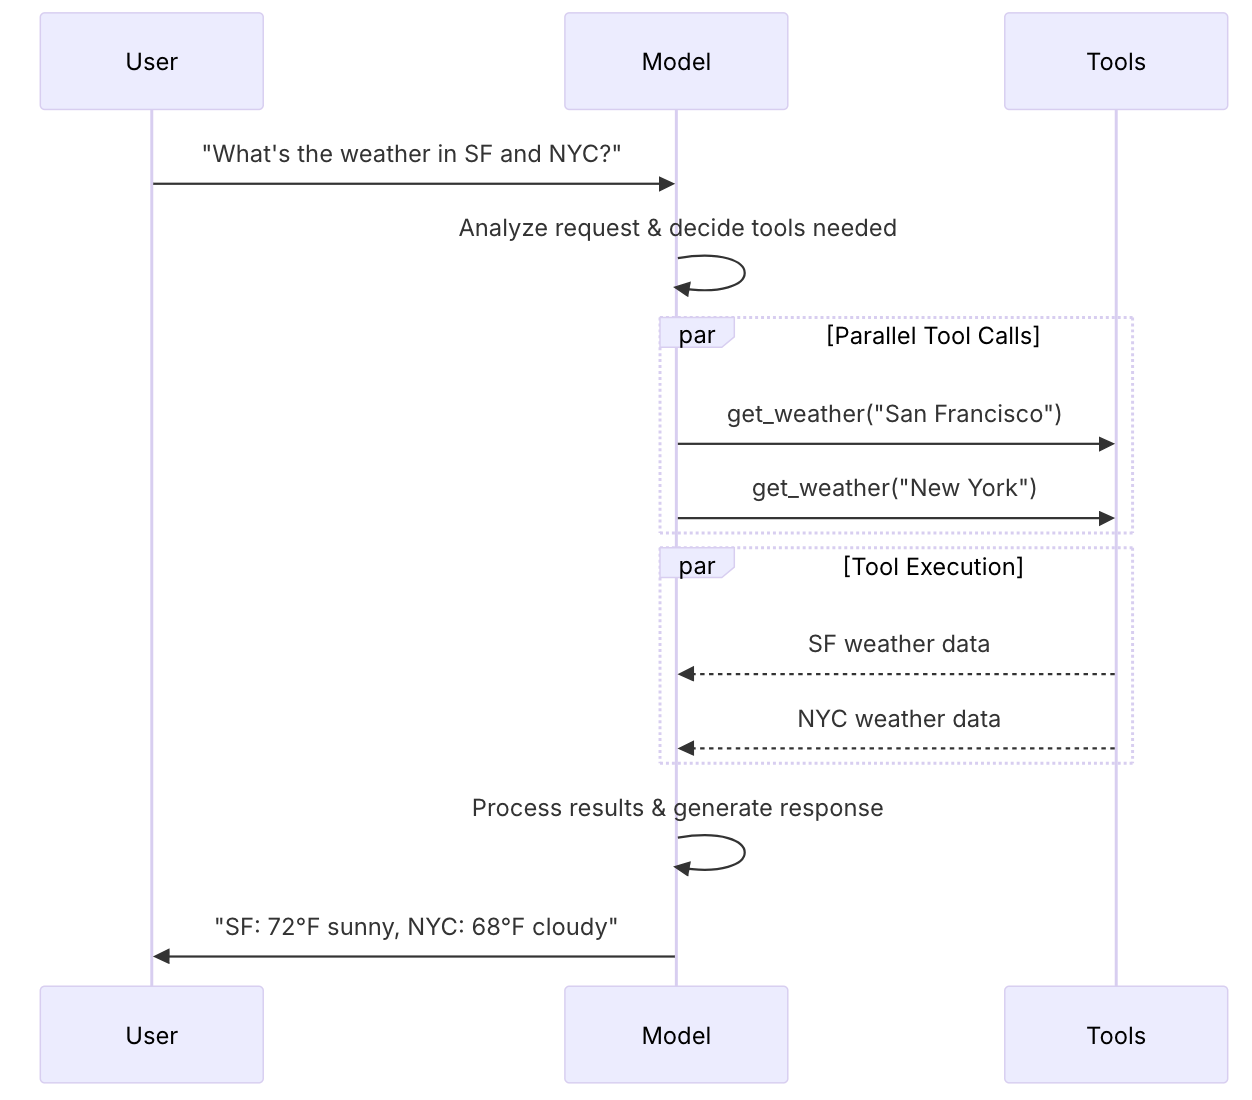

如果想让模型调用工具，必须使用bind_tools把tool绑定到大模型

In [11]:
from langchain.tools import tool

@tool
def get_weather(location: str) -> str:
    """Get the weather at a location."""
    return f"It's sunny in {location}."


model_with_tools = model.bind_tools([get_weather])  

response = model_with_tools.invoke("What's the weather like in Boston?")
for tool_call in response.tool_calls:
    # View tool calls made by the model
    print(f"Tool: {tool_call['name']}")
    print(f"Args: {tool_call['args']}")

Tool: get_weather
Args: {'location': 'Boston'}


## 2.1 Tool execution loop

In [12]:
# Bind (potentially multiple) tools to the model
model_with_tools = model.bind_tools([get_weather])

# Step 1: Model generates tool calls
messages = [{"role": "user", "content": "What's the weather in Boston?"}]
ai_msg = model_with_tools.invoke(messages)
messages.append(ai_msg)

# Step 2: Execute tools and collect results
for tool_call in ai_msg.tool_calls:
    # Execute the tool with the generated arguments
    tool_result = get_weather.invoke(tool_call)
    messages.append(tool_result)

# Step 3: Pass results back to model for final response
final_response = model_with_tools.invoke(messages)
print(final_response.text)
# "The current weather in Boston is 72°F and sunny."

The weather in Boston is sunny.


## 2.2 Forcing tool calls
大模型默认随时选择tool的；但是如果需要，可以使用如下方法强制调用特定tool

In [14]:
# 选择tool列表中任意tool
model_with_tools = model.bind_tools([tool_1], tool_choice="any")

# 选择特定tool
model_with_tools = model.bind_tools([tool_1], tool_choice="tool_1")

## 2.3 Parallel tool calls

In [ ]:
model_with_tools = model.bind_tools([get_weather])

response = model_with_tools.invoke(
    "What's the weather in Boston and Tokyo?"
)


# The model may generate multiple tool calls
print(response.tool_calls)
# [
#   {'name': 'get_weather', 'args': {'location': 'Boston'}, 'id': 'call_1'},
#   {'name': 'get_weather', 'args': {'location': 'Tokyo'}, 'id': 'call_2'},
# ]


# Execute all tools (can be done in parallel with async)
results = []
for tool_call in response.tool_calls:
    if tool_call['name'] == 'get_weather':
        result = get_weather.invoke(tool_call)
    ...
    results.append(result)

## 2.4 Streaming tool calls

In [15]:
for chunk in model_with_tools.stream(
    "What's the weather in Boston and Tokyo?"
):
    # Tool call chunks arrive progressively
    for tool_chunk in chunk.tool_call_chunks:
        if name := tool_chunk.get("name"):
            print(f"Tool: {name}")
        if id_ := tool_chunk.get("id"):
            print(f"ID: {id_}")
        if args := tool_chunk.get("args"):
            print(f"Args: {args}")

Tool: get_weather
ID: call_J5UT9nwEIf6amtFM7iIhLfSo
Args: {"lo
Args: catio
Args: n": "B
Args: osto
Args: n"}
Tool: get_weather
ID: call_U0nJXTaMkse5eh3PBehPPFQ8
Args: {"lo
Args: catio
Args: n": "T
Args: okyo
Args: "}


In [16]:
# 收集所有的chunk，从而获取完整的工具调用
gathered = None
for chunk in model_with_tools.stream("What's the weather in Boston?"):
    gathered = chunk if gathered is None else gathered + chunk
    print(gathered.tool_calls)

[{'name': 'get_weather', 'args': {}, 'id': 'call_TmZPhxG7iGZNg1in9oixbyTa', 'type': 'tool_call'}]
[{'name': 'get_weather', 'args': {}, 'id': 'call_TmZPhxG7iGZNg1in9oixbyTa', 'type': 'tool_call'}]
[{'name': 'get_weather', 'args': {}, 'id': 'call_TmZPhxG7iGZNg1in9oixbyTa', 'type': 'tool_call'}]
[{'name': 'get_weather', 'args': {'location': ''}, 'id': 'call_TmZPhxG7iGZNg1in9oixbyTa', 'type': 'tool_call'}]
[{'name': 'get_weather', 'args': {'location': 'Boston'}, 'id': 'call_TmZPhxG7iGZNg1in9oixbyTa', 'type': 'tool_call'}]
[{'name': 'get_weather', 'args': {'location': 'Boston'}, 'id': 'call_TmZPhxG7iGZNg1in9oixbyTa', 'type': 'tool_call'}]
[{'name': 'get_weather', 'args': {'location': 'Boston'}, 'id': 'call_TmZPhxG7iGZNg1in9oixbyTa', 'type': 'tool_call'}]
[{'name': 'get_weather', 'args': {'location': 'Boston'}, 'id': 'call_TmZPhxG7iGZNg1in9oixbyTa', 'type': 'tool_call'}]
[{'name': 'get_weather', 'args': {'location': 'Boston'}, 'id': 'call_TmZPhxG7iGZNg1in9oixbyTa', 'type': 'tool_call'}]


# 三、Structured output

## 3.1 Pydantic

In [17]:
from pydantic import BaseModel, Field

class Movie(BaseModel):
    """A movie with details."""
    title: str = Field(..., description="The title of the movie")
    year: int = Field(..., description="The year the movie was released")
    director: str = Field(..., description="The director of the movie")
    rating: float = Field(..., description="The movie's rating out of 10")

model_with_structure = model.with_structured_output(Movie)
response = model_with_structure.invoke("Provide details about the movie Inception")
print(response)  # Movie(title="Inception", year=2010, director="Christopher Nolan", rating=8.8)

title='Inception' year=2010 director='Christopher Nolan' rating=8.8


## 3.2 TypedDict

In [18]:
from typing_extensions import TypedDict, Annotated

class MovieDict(TypedDict):
    """A movie with details."""
    title: Annotated[str, ..., "The title of the movie"]
    year: Annotated[int, ..., "The year the movie was released"]
    director: Annotated[str, ..., "The director of the movie"]
    rating: Annotated[float, ..., "The movie's rating out of 10"]

model_with_structure = model.with_structured_output(MovieDict)
response = model_with_structure.invoke("Provide details about the movie Inception")
print(response)  # {'title': 'Inception', 'year': 2010, 'director': 'Christopher Nolan', 'rating': 8.8}

{'title': 'Inception', 'year': 2010, 'director': 'Christopher Nolan', 'rating': 8.8}


## 3.3 JSON Schema

In [19]:
import json

json_schema = {
    "title": "Movie",
    "description": "A movie with details",
    "type": "object",
    "properties": {
        "title": {
            "type": "string",
            "description": "The title of the movie"
        },
        "year": {
            "type": "integer",
            "description": "The year the movie was released"
        },
        "director": {
            "type": "string",
            "description": "The director of the movie"
        },
        "rating": {
            "type": "number",
            "description": "The movie's rating out of 10"
        }
    },
    "required": ["title", "year", "director", "rating"]
}

model_with_structure = model.with_structured_output(
    json_schema,
    method="json_schema",
)
response = model_with_structure.invoke("Provide details about the movie Inception")
print(response)  # {'title': 'Inception', 'year': 2010, ...}

{'title': 'Inception', 'year': 2010, 'director': 'Christopher Nolan', 'rating': 8.8}


结构化输出的关键注意事项：
- 方法参数：不同提供商支持的方法各异（json_schema、function_calling、json_mode）。
  - json_schema 通常指提供商专门提供的结构化输出功能。
  - function_calling 通过强制按给定模式调用工具来生成结构化输出。
  - json_mode 是某些提供商在 json_schema 之前的过渡方案，仅保证输出合法 JSON，模式必须在提示中描述。
- include_raw：设为 True 可同时返回解析后的结果与原始 AI 消息。
- Validation：Pydantic 模型可自动校验；TypedDict 和 JSON Schema 需手动校验。

## Example: Message output alongside parsed structure

In [20]:
from pydantic import BaseModel, Field

class Movie(BaseModel):
    """A movie with details."""
    title: str = Field(..., description="The title of the movie")
    year: int = Field(..., description="The year the movie was released")
    director: str = Field(..., description="The director of the movie")
    rating: float = Field(..., description="The movie's rating out of 10")

model_with_structure = model.with_structured_output(Movie, include_raw=True)  
response = model_with_structure.invoke("Provide details about the movie Inception")
response
# {
#     "raw": AIMessage(...),
#     "parsed": Movie(title=..., year=..., ...),
#     "parsing_error": None,
# }

{'raw': AIMessage(content='{"title":"Inception","year":2010,"director":"Christopher Nolan","rating":8.8}', additional_kwargs={'parsed': Movie(title='Inception', year=2010, director='Christopher Nolan', rating=8.8), 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 126, 'total_tokens': 148, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_d38c7f4fa7', 'id': 'chatcmpl-CbiZertPeWKpuqEUWoyXEUk0rTNoa', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--965a96fa-1d26-4237-93de-5afdb0108e0f-0', usage_metadata={'input_tokens': 126, 'output_tokens': 22, 'total_tokens': 148, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 

## Example: Nested structures

In [21]:
from pydantic import BaseModel, Field

class Actor(BaseModel):
    name: str
    role: str

class MovieDetails(BaseModel):
    title: str
    year: int
    cast: list[Actor]
    genres: list[str]
    budget: float | None = Field(None, description="Budget in millions USD")

model_with_structure = model.with_structured_output(MovieDetails)

# 四、Rate limiting

In [22]:
from langchain_core.rate_limiters import InMemoryRateLimiter

rate_limiter = InMemoryRateLimiter(
    requests_per_second=0.1,  # 1 request every 10s
    check_every_n_seconds=0.1,  # Check every 100ms whether allowed to make a request
    max_bucket_size=10,  # Controls the maximum burst size.
)

model = init_chat_model(
    model="gpt-5",
    model_provider="openai",
    rate_limiter=rate_limiter  
)

# 五、Base URL or proxy

如果我们使用Together AI, vLLM等框架部署大模型后，也可以通过init_chat_model方法调用

## 5.1 Base URL

In [ ]:
model = init_chat_model(
    model="MODEL_NAME",
    model_provider="openai",
    base_url="BASE_URL",
    api_key="YOUR_API_KEY",
)

## 5.2 Proxy

有时候部署的时候，需要http协议

In [ ]:
from langchain_openai import ChatOpenAI

model = ChatOpenAI(
    model="gpt-4o",
    openai_proxy="http://proxy.example.com:8080"
)

# 六、Log probabilities

In [23]:
# 有的模型支持返回每个token的对数似然
model = init_chat_model(
    model="gpt-4o",
    model_provider="openai"
).bind(logprobs=True)

response = model.invoke("Why do parrots talk?")
print(response.response_metadata["logprobs"])

{'content': [{'token': 'Par', 'bytes': [80, 97, 114], 'logprob': -4.320199877838604e-07, 'top_logprobs': []}, {'token': 'rots', 'bytes': [114, 111, 116, 115], 'logprob': -5.512236498361744e-07, 'top_logprobs': []}, {'token': ' are', 'bytes': [32, 97, 114, 101], 'logprob': -0.10013657063245773, 'top_logprobs': []}, {'token': ' capable', 'bytes': [32, 99, 97, 112, 97, 98, 108, 101], 'logprob': -3.8055710792541504, 'top_logprobs': []}, {'token': ' of', 'bytes': [32, 111, 102], 'logprob': -1.9361264946837764e-07, 'top_logprobs': []}, {'token': ' "', 'bytes': [32, 34], 'logprob': -0.49439311027526855, 'top_logprobs': []}, {'token': 'talk', 'bytes': [116, 97, 108, 107], 'logprob': -3.7697225252486533e-06, 'top_logprobs': []}, {'token': 'ing', 'bytes': [105, 110, 103], 'logprob': -1.9361264946837764e-07, 'top_logprobs': []}, {'token': '"', 'bytes': [34], 'logprob': -0.05499241501092911, 'top_logprobs': []}, {'token': ' because', 'bytes': [32, 98, 101, 99, 97, 117, 115, 101], 'logprob': -1.271

# 七、Token usage

## 7.1 Callback handler

In [26]:
from langchain.chat_models import init_chat_model
from langchain_core.callbacks import UsageMetadataCallbackHandler

model_1 = init_chat_model(model="gpt-4o-mini")
model_2 = init_chat_model(model="deepseek-chat")

callback = UsageMetadataCallbackHandler()
result_1 = model_1.invoke("Hello", config={"callbacks": [callback]})
result_2 = model_2.invoke("Hello", config={"callbacks": [callback]})
callback.usage_metadata

{'gpt-4o-mini-2024-07-18': {'input_tokens': 8,
  'output_tokens': 9,
  'total_tokens': 17,
  'input_token_details': {'audio': 0, 'cache_read': 0},
  'output_token_details': {'audio': 0, 'reasoning': 0}},
 'deepseek-chat': {'input_tokens': 5,
  'output_tokens': 11,
  'total_tokens': 16,
  'input_token_details': {'cache_read': 0},
  'output_token_details': {}}}

## 7.2 Context manager

In [27]:
from langchain.chat_models import init_chat_model
from langchain_core.callbacks import get_usage_metadata_callback

model_1 = init_chat_model(model="gpt-4o-mini")
model_2 = init_chat_model(model="deepseek-chat")

with get_usage_metadata_callback() as cb:
    model_1.invoke("Hello")
    model_2.invoke("Hello")
    print(cb.usage_metadata)

{'gpt-4o-mini-2024-07-18': {'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}, 'deepseek-chat': {'input_tokens': 5, 'output_tokens': 11, 'total_tokens': 16, 'input_token_details': {'cache_read': 0}, 'output_token_details': {}}}


# 八、Invocation config

主要适用于一下场景：
- 使用LangSmith跟踪和debug
- 自定义log和监控
- 控制资源使用量

In [ ]:
response = model.invoke(
    "Tell me a joke",
    config={
        "run_name": "joke_generation",      # Custom name for this run
        "tags": ["humor", "demo"],          # Tags for categorization
        "metadata": {"user_id": "123"},     # Custom metadata
        "callbacks": [my_callback_handler], # Callback handlers
    }
)

- run_name：在日志与追踪中标识本次具体调用，不会被子调用继承。  
- tags：标签，会被子调用继承，用于在调试工具中过滤与归类。  
- metadata：自定义键值对，可携带额外上下文，会被子调用继承。  
- max_concurrency：使用 batch() 或 batch_as_completed() 时，控制最大并行调用数。  
- callbacks：事件处理器，用于在执行期间监控并响应各类事件。  
- recursion_limit：链的最大递归深度，防止复杂管道出现无限循环。

# 九、Configurable models

In [ ]:
from langchain.chat_models import init_chat_model

configurable_model = init_chat_model(temperature=0)

configurable_model.invoke(
    "what's your name",
    config={"configurable": {"model": "gpt-5-nano"}},  # Run with GPT-5-Nano
)
configurable_model.invoke(
    "what's your name",
    config={"configurable": {"model": "claude-sonnet-4-5-20250929"}},  # Run with Claude
)

## 9.1 Configurable model with default values

In [28]:
first_model = init_chat_model(
        model="gpt-4.1-mini",
        temperature=0,
        configurable_fields=("model", "model_provider", "temperature", "max_tokens"),
        config_prefix="first",  # Useful when you have a chain with multiple models
)

first_model.invoke("what's your name")

AIMessage(content="I'm ChatGPT! How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 11, 'total_tokens': 22, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_4c2851f862', 'id': 'chatcmpl-CbkETe8oQiAQqrexDI4imrP6z7vhk', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--3ee04804-b5b8-4015-bc0d-964ca455ec79-0', usage_metadata={'input_tokens': 11, 'output_tokens': 11, 'total_tokens': 22, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [29]:
first_model.invoke(
    "what's your name",
    config={
        "configurable": {
            "first_model": "deepseek-chat",
            "first_temperature": 0.5,
            "first_max_tokens": 100,
        }
    },
)

AIMessage(content="Hi there! I'm DeepSeek, an AI assistant created by DeepSeek Company. I'm here to help you with questions, conversations, and various tasks. It's nice to meet you! 😊\n\nIs there anything specific I can help you with today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 55, 'prompt_tokens': 8, 'total_tokens': 63, 'completion_tokens_details': None, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}, 'prompt_cache_hit_tokens': 0, 'prompt_cache_miss_tokens': 8}, 'model_provider': 'deepseek', 'model_name': 'deepseek-chat', 'system_fingerprint': 'fp_ffc7281d48_prod0820_fp8_kvcache', 'id': '8b0d2a07-1806-4a7e-864f-90edfddd9934', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--4f2cea85-e425-4e9c-9716-e8d47ad72386-0', usage_metadata={'input_tokens': 8, 'output_tokens': 55, 'total_tokens': 63, 'input_token_details': {'cache_read': 0}, 'output_token_details': {}})

## 9.2 Using a configurable model declaratively

In [31]:
from pydantic import BaseModel, Field


class GetWeather(BaseModel):
    """Get the current weather in a given location"""

    location: str = Field(..., description="The city and state, e.g. San Francisco, CA")


class GetPopulation(BaseModel):
    """Get the current population in a given location"""

    location: str = Field(..., description="The city and state, e.g. San Francisco, CA")


model = init_chat_model(temperature=0)
model_with_tools = model.bind_tools([GetWeather, GetPopulation])

model_with_tools.invoke(
    "what's bigger in 2024 LA or NYC", config={"configurable": {"model": "gpt-4.1-mini"}}
).tool_calls

[{'name': 'GetPopulation',
  'args': {'location': 'Los Angeles, CA'},
  'id': 'call_0ArHU9Bf2URhRdEujIVAlT3G',
  'type': 'tool_call'},
 {'name': 'GetPopulation',
  'args': {'location': 'New York, NY'},
  'id': 'call_J9iGS34RNSNFdqTUiM24bBPI',
  'type': 'tool_call'}]

In [33]:
model_with_tools.invoke(
    "what's bigger in 2024 LA or NYC",
    config={"configurable": {"model": "gpt-4.1-mini"}},
).tool_calls

[{'name': 'GetPopulation',
  'args': {'location': 'Los Angeles, CA'},
  'id': 'call_t14nfgoQvpmI10M1vv7foOYo',
  'type': 'tool_call'},
 {'name': 'GetPopulation',
  'args': {'location': 'New York, NY'},
  'id': 'call_aIuqMQIJXvZRUKTS8vTmEtJ4',
  'type': 'tool_call'}]